In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("ev.csv")
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP5D,King,Seattle,WA,98119.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,36.0,211807760,POINT (-122.3684 47.64586),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10


In [3]:
df = df[df["Postal Code"].notnull()]
df['Postal Code'] = df['Postal Code'].astype(float)

In [17]:
df_x = df.groupby("Postal Code").agg(car_count=("Postal Code", "count"), car_range=("Electric Range", "mean"))
print("DF size:", df_x.shape[0])
df_x.sort_values("car_count", ascending=False).head()

DF size: 787


,car_count,car_range
Postal Code,,
98052.0,3384,77.608747
98033.0,2315,92.768035
98012.0,2265,68.806623
98004.0,2221,89.060783
98006.0,2139,84.255727


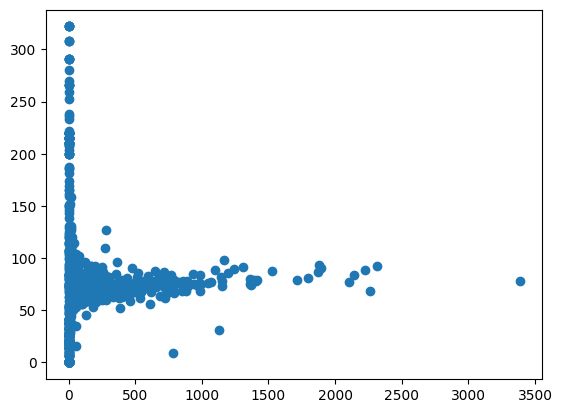

In [5]:
import matplotlib.pyplot as plt

plt.plot(df_x["car_count"], df_x["car_range"], "o")

In [6]:
print(df_x[df_x['car_count'] > 500].count())
df_y = df.merge(df_x[df_x['car_count'] > 500], right_index=True, left_on="Postal Code")
df_y.Make.mode()

car_count    85
car_range    85
dtype: int64


0    TESLA
Name: Make, dtype: object

In [7]:
df_2 = pd.read_csv("utilities.csv")
df_2 = df_2[df_2['state'] == "WA"]
df_2['zip'] = df_2['zip'].astype(float)
df_2.count()

zip             665
eiaid           665
utility_name    665
state           665
service_type    665
ownership       665
comm_rate       665
ind_rate        665
res_rate        665
dtype: int64

In [8]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 665 entries, 32194 to 46985
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   zip           665 non-null    float64
 1   eiaid         665 non-null    int64  
 2   utility_name  665 non-null    object 
 3   state         665 non-null    object 
 4   service_type  665 non-null    object 
 5   ownership     665 non-null    object 
 6   comm_rate     665 non-null    float64
 7   ind_rate      665 non-null    float64
 8   res_rate      665 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 52.0+ KB


In [9]:
len(df_2['zip'].unique())

407

In [10]:
df_2.head()

,zip,eiaid,utility_name,state,service_type,ownership,comm_rate,ind_rate,res_rate
32194,99338.0,14354,PacifiCorp,WA,Bundled,Investor Owned,0.081184,0.07072,0.083047
32195,99346.0,14354,PacifiCorp,WA,Bundled,Investor Owned,0.081184,0.07072,0.083047
32196,99360.0,14354,PacifiCorp,WA,Bundled,Investor Owned,0.081184,0.07072,0.083047
32197,99356.0,14354,PacifiCorp,WA,Bundled,Investor Owned,0.081184,0.07072,0.083047
32198,98953.0,14354,PacifiCorp,WA,Bundled,Investor Owned,0.081184,0.07072,0.083047


In [11]:
df_2_x = df_2.groupby('zip').agg(residential=('res_rate', 'mean'))
b = df_2_x.merge(df_x, right_index=True, left_index=True)
b.head()

,residential,car_count,car_range
98001.0,0.054027,537,62.232775
98002.0,0.054027,192,74.432292
98003.0,0.054027,380,61.463158
98004.0,0.054027,2221,89.060783
98005.0,0.054027,987,84.045593


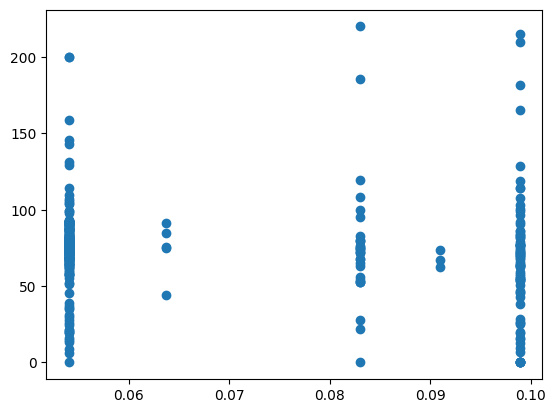

In [14]:
plt.plot(b['residential'], b['car_range'], 'o')

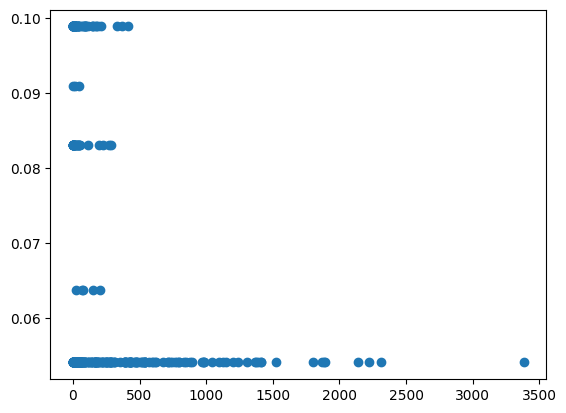

In [13]:
plt.plot(b['car_count'], b['residential'], 'o')